In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Project'
!ls

[Errno 2] No such file or directory: '/content/drive/MyDrive/Project'
/content
sample_data


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from pandas import read_csv
from pandas import set_option
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

I. LOADING VÀ CHECK THÔNG TIN CÁC CỘT DỮ LIỆU CỦA DATASET


In [ ]:
data = pd.read_csv('Dataset.csv') 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
print("Data has {} row and {} column".format(data.shape[0], data.shape[1]))

Data has 614 row and 13 column


In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


II. PHÂN TÍCH DỮ LIỆU


In [ ]:
#Vì cột Credit_Histoty chỉ có 2 giá trị 0 và 1 nên đổi sang kiểu Object luôn 
data['Credit_History'] = data['Credit_History'].astype('O')

In [ ]:
#Bỏ luôn cột Loan_ID vì không đóng góp đc gì cho việc đánh giá dữ liệu
data.drop('Loan_ID', axis=1, inplace=True)

The percentage of Y class : 0.69
The percentage of N class : 0.31


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


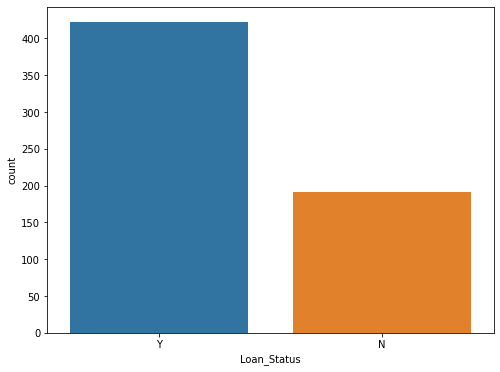

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data['Loan_Status']);

print('The percentage of Y class : %.2f' % (data['Loan_Status'].value_counts()[0] / len(data)))
print('The percentage of N class : %.2f' % (data['Loan_Status'].value_counts()[1] / len(data)))

Text(0.5, 0, 'Credit_History')

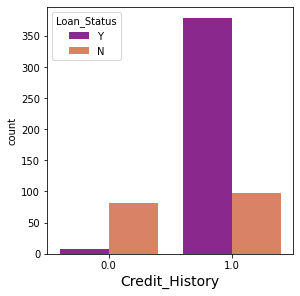

In [ ]:
#Credit_History
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.countplot(x=data['Credit_History'] ,hue='Loan_Status', data=data ,palette='plasma')
plt.xlabel('Credit_History', fontsize=14)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


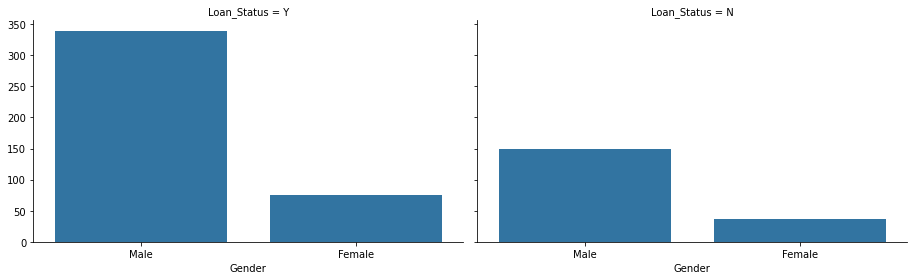

In [ ]:
# Gender
grid = sns.FacetGrid(data,col='Loan_Status', height=4, aspect=1.6)
grid.map(sns.countplot, 'Gender');
#Nam nữ như nhau.

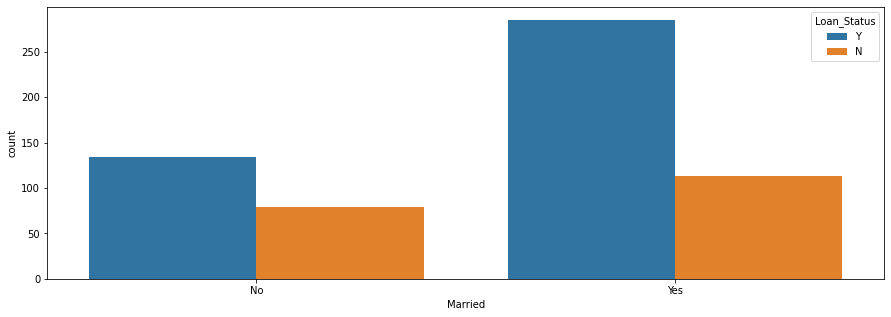

In [ ]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='Married', hue='Loan_Status', data=data);
#Người đã kết hôn có cơ hội vay tiền hơn.

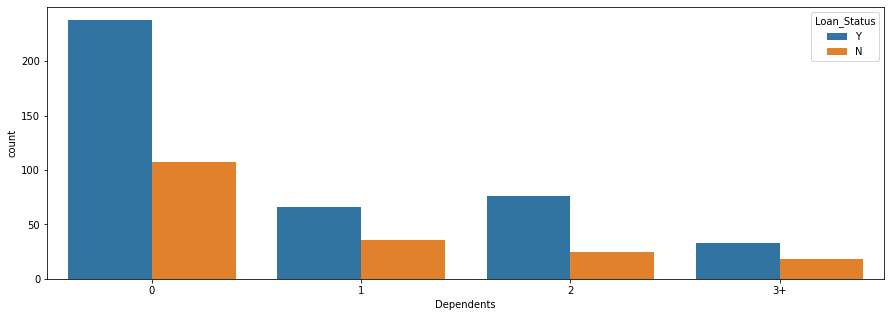

In [ ]:
# Dependents
plt.figure(figsize=(15,5))
sns.countplot(x='Dependents', hue='Loan_Status', data=data);
#Càng ít người phụ thuộc càng dễ vay tiền hơn

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


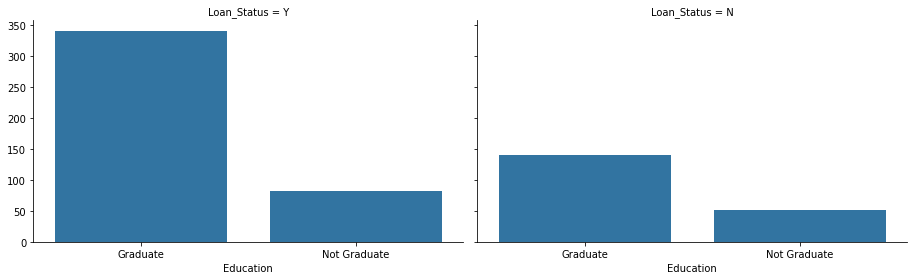

In [ ]:
# Education
grid = sns.FacetGrid(data,col='Loan_Status', height=4, aspect=1.6)
grid.map(sns.countplot, 'Education');
#Không có gì nổi bật

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


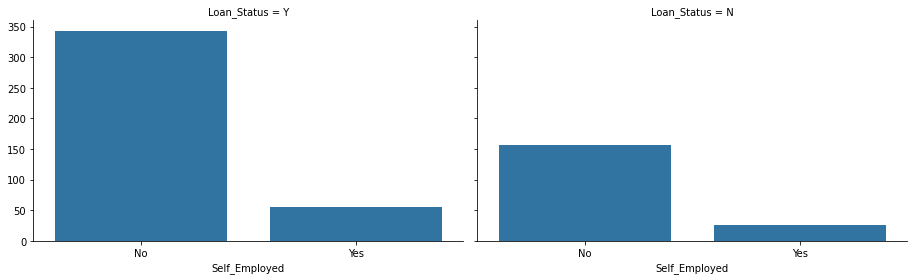

In [ ]:
# Self_Employed
grid = sns.FacetGrid(data,col='Loan_Status', height= 4, aspect=1.6)
grid.map(sns.countplot, 'Self_Employed');
#Không có gì nổi bật

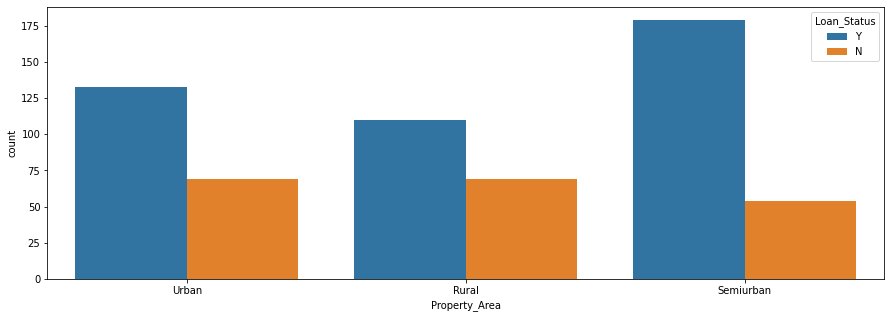

In [ ]:
# Property_Area
plt.figure(figsize=(15,5))
sns.countplot(x='Property_Area', hue='Loan_Status', data=data);
#Có vẻ như ở bán thành thị có cơ hội vay cao hơn

III. XỬ LÍ CÁC DỮ LIỆU NULL

In [ ]:
#Check các dữ liệu null
data.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

In [ ]:
cat_data = []
num_data = []

for i,c in enumerate(data.dtypes):
    if c == object:
        cat_data.append(data.iloc[:, i])
    else :
        num_data.append(data.iloc[:, i])

In [ ]:
cat_data = pd.DataFrame(cat_data).transpose()
num_data = pd.DataFrame(num_data).transpose()

In [ ]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y


In [ ]:
num_data.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849.0,0.0,NaN,360.0
1,4583.0,1508.0,128.0,360.0
2,3000.0,0.0,66.0,360.0
3,2583.0,2358.0,120.0,360.0
4,6000.0,0.0,141.0,360.0


In [ ]:
#Thay những điểm bị miss dữ liệu bằng 1 dữ liệu phổ biến nhất của cột đó
cat_data = cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [ ]:
#Thay những điểm bị miss dữ liệu bằng 1 dữ liệu bằng 1 dữ liệu trước nó trong cùng 1 cột
num_data.fillna(method='bfill', inplace=True)

IV. ĐƯA CÁC DỮ LIỆU DẠNG CHỮ VỀ SỐ PHÂN LOẠI 0, 1, 2


In [ ]:
from sklearn.preprocessing import LabelEncoder  
le = LabelEncoder()
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [ ]:
# transform the target column

target_values = {'Y': 0 , 'N' : 1}

target = cat_data['Loan_Status']
cat_data.drop('Loan_Status', axis=1, inplace=True)

target = target.map(target_values)

In [ ]:
# transform other columns

for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])

In [ ]:
cat_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


In [ ]:
data = pd.concat([cat_data, num_data, target], axis=1)
data.head()
#Male = 1, Married = 1, Graduate = 0, rural = 0, semiurban = 1, YES = 1

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849.0,0.0,128.0,360.0,0
1,1,1,1,0,0,1,0,4583.0,1508.0,128.0,360.0,1
2,1,1,0,0,1,1,2,3000.0,0.0,66.0,360.0,0
3,1,1,0,1,0,1,2,2583.0,2358.0,120.0,360.0,0
4,1,0,0,0,0,1,2,6000.0,0.0,141.0,360.0,0


In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
Gender,1.00,0.36,0.17,0.05,-0.00,0.01,-0.03,0.06,0.08,0.12,-0.07,-0.02
Married,0.36,1.00,0.33,0.01,0.00,0.01,0.00,0.05,0.08,0.14,-0.10,-0.09
Dependents,0.17,0.33,1.00,0.06,0.06,-0.04,-0.00,0.12,0.03,0.16,-0.10,-0.01
Education,0.05,0.01,0.06,1.00,-0.01,-0.07,-0.07,-0.14,-0.06,-0.17,-0.07,0.09
Self_Employed,-0.00,0.00,0.06,-0.01,1.00,-0.00,-0.03,0.13,-0.02,0.11,-0.03,0.00
Credit_History,0.01,0.01,-0.04,-0.07,-0.00,1.00,0.00,-0.02,0.01,0.00,-0.00,-0.54
Property_Area,-0.03,0.00,-0.00,-0.07,-0.03,0.00,1.00,-0.01,0.01,-0.05,-0.08,-0.03
ApplicantIncome,0.06,0.05,0.12,-0.14,0.13,-0.02,-0.01,1.00,-0.12,0.56,-0.05,0.00
CoapplicantIncome,0.08,0.08,0.03,-0.06,-0.02,0.01,0.01,-0.12,1.00,0.19,-0.06,0.06
LoanAmount,0.12,0.14,0.16,-0.17,0.11,0.00,-0.05,0.56,0.19,1.00,0.04,0.04


V.Train data

In [ ]:
array = data.values
X = array[:,0:11]
Y = array[:,11]
validation_size = 0.20
seed = 42
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [ ]:
X_train.shape, X_validation.shape

((491, 11), (123, 11))

In [ ]:
num_folds = 10
seed = 7
scoring = 'accuracy'

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [ ]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

LR: 0.806612 (0.034964)
LDA: 0.812735 (0.041977)
KNN: 0.660122 (0.057177)
CART: 0.714857 (0.040852)
NB: 0.796327 (0.037651)
SVM: 0.688490 (0.050928)


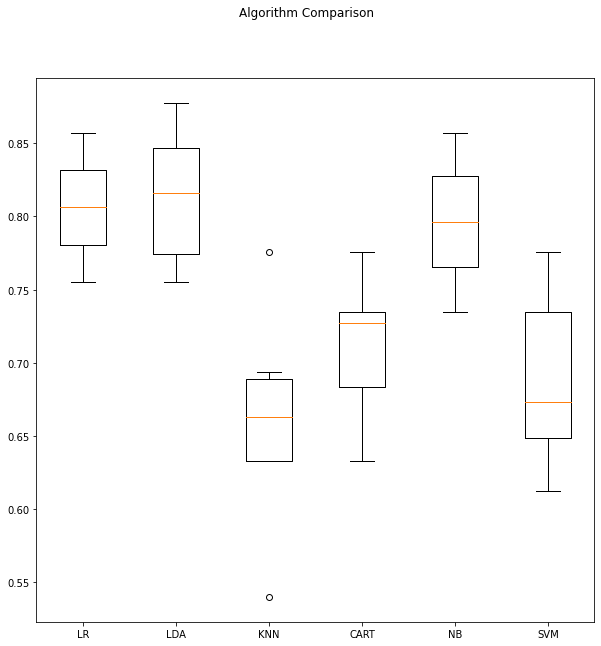

In [ ]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

ScaledLR: 0.810694 (0.040228)
ScaledLDA: 0.812735 (0.041977)
ScaledKNN: 0.788204 (0.040908)
ScaledCART: 0.712776 (0.053814)
ScaledNB: 0.798367 (0.029501)
ScaledSVM: 0.800490 (0.039041)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
shrinkage_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
solver_values = ['svd', 'lsqr', 'eigen']
param_grid = dict(shrinkage=shrinkage_values, solver = solver_values)
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
NotImplementedError: shrinkage not supported

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
NotImplementedError: shrinkage not supported

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

Best: 0.814776 using {'shrinkage': 0.4, 'solver': 'lsqr'}
nan (nan) with: {'shrinkage': 0.1, 'solver': 'svd'}
0.812735 (0.041977) with: {'shrinkage': 0.1, 'solver': 'lsqr'}
0.812735 (0.041977) with: {'shrinkage': 0.1, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.2, 'solver': 'svd'}
0.812735 (0.041977) with: {'shrinkage': 0.2, 'solver': 'lsqr'}
0.812735 (0.041977) with: {'shrinkage': 0.2, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.3, 'solver': 'svd'}
0.812735 (0.041977) with: {'shrinkage': 0.3, 'solver': 'lsqr'}
0.812735 (0.041977) with: {'shrinkage': 0.3, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.4, 'solver': 'svd'}
0.814776 (0.042594) with: {'shrinkage': 0.4, 'solver': 'lsqr'}
0.814776 (0.042594) with: {'shrinkage': 0.4, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.5, 'solver': 'svd'}
0.814776 (0.042594) with: {'shrinkage': 0.5, 'solver': 'lsqr'}
0.814776 (0.042594) with: {'shrinkage': 0.5, 'solver': 'eigen'}
nan (nan) with: {'shrinkage': 0.6, 'solver': 's

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
NotImplementedError: shrinkage not supported

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
NotImplementedError: shrinkage not supported

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
NotImplementedError: shrinkage not supported

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition f

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.814776 using {'C': 0.1, 'kernel': 'linear'}
0.814776 (0.042594) with: {'C': 0.1, 'kernel': 'linear'}
0.782163 (0.041306) with: {'C': 0.1, 'kernel': 'poly'}
0.784204 (0.046184) with: {'C': 0.1, 'kernel': 'rbf'}
0.814776 (0.042594) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.814776 (0.042594) with: {'C': 0.3, 'kernel': 'linear'}
0.814694 (0.040083) with: {'C': 0.3, 'kernel': 'poly'}
0.808694 (0.047682) with: {'C': 0.3, 'kernel': 'rbf'}
0.812735 (0.041977) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.814776 (0.042594) with: {'C': 0.5, 'kernel': 'linear'}
0.806612 (0.040484) with: {'C': 0.5, 'kernel': 'poly'}
0.810735 (0.044822) with: {'C': 0.5, 'kernel': 'rbf'}
0.810694 (0.039179) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.814776 (0.042594) with: {'C': 0.7, 'kernel': 'linear'}
0.800490 (0.040094) with: {'C': 0.7, 'kernel': 'poly'}
0.804612 (0.040144) with: {'C': 0.7, 'kernel': 'rbf'}
0.806653 (0.042192) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.814776 (0.042594) with: {'C': 0.9, 'kernel': 'line

In [ ]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AB: 0.794327 (0.043074)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GBM: 0.784122 (0.038865)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.802367 (0.040130)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ET: 0.778000 (0.049529)


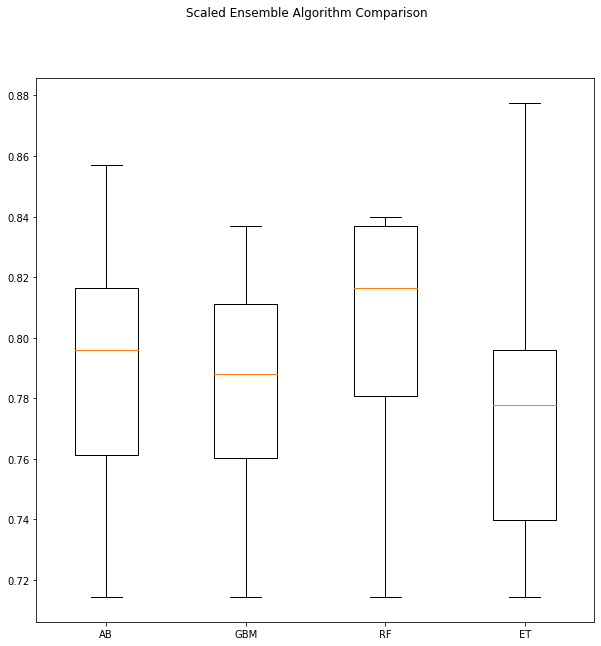

In [ ]:
fig = pyplot.figure(figsize=(10, 10))
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [ ]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50, 100, 150, 200, 250, 300, 350, 400]))
model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: 0.804490 using {'n_estimators': 350}
0.800408 (0.032625) with: {'n_estimators': 50}
0.798408 (0.038968) with: {'n_estimators': 100}
0.802449 (0.040824) with: {'n_estimators': 150}
0.802490 (0.040597) with: {'n_estimators': 200}
0.802490 (0.040597) with: {'n_estimators': 250}
0.802490 (0.040597) with: {'n_estimators': 300}
0.804490 (0.039927) with: {'n_estimators': 350}
0.804490 (0.039927) with: {'n_estimators': 400}


Thử model LDA

In [ ]:
modelLDA = LinearDiscriminantAnalysis(shrinkage=0.4, solver='lsqr')
modelLDA.fit(X_train, Y_train)
predictions = modelLDA.predict(X_validation)

0.7026476578411406
0.6504065040650406
[[80  0]
 [43  0]]
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        80
         1.0       0.00      0.00      0.00        43

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Thử model RF

In [ ]:
modelRF = RandomForestClassifier(random_state=seed, n_estimators=350)
modelRF.fit(X_train, Y_train)
predictions = modelRF.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, modelRF.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

1.0
0.7804878048780488
[[78  2]
 [25 18]]
              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85        80
         1.0       0.90      0.42      0.57        43

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



Thử model SVC


In [ ]:
model = SVC(C=0.1, kernel='linear')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [ ]:
print(accuracy_score(Y_train, model.predict(X_train)))
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.8105906313645621
0.7967479674796748
[[80  0]
 [25 18]]
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86        80
         1.0       1.00      0.42      0.59        43

    accuracy                           0.80       123
   macro avg       0.88      0.71      0.73       123
weighted avg       0.85      0.80      0.77       123



In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,146.412162,360.0,1.0,0
1,1,1,1,0,0,0,4583.0,1508.0,128.000000,360.0,1.0,1
2,1,1,0,0,1,2,3000.0,0.0,66.000000,360.0,1.0,0
3,1,1,0,1,0,2,2583.0,2358.0,120.000000,360.0,1.0,0
4,1,0,0,0,0,2,6000.0,0.0,141.000000,360.0,1.0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1343787a90>]],
      dtype=object)

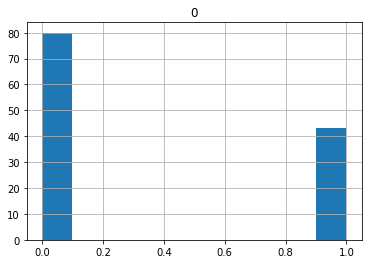

In [ ]:
validation = pd.DataFrame(data=Y_validation)
validation.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1343787d50>]],
      dtype=object)

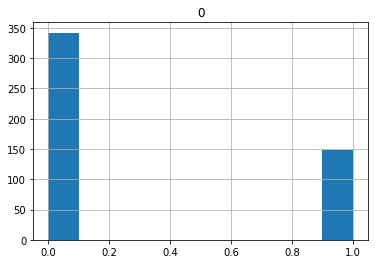

In [ ]:
train = pd.DataFrame(data=Y_train)
train.hist()